In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('ElectricCarData_Norm.csv')

In [4]:
df.columns

Index(['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency',
       'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'PriceEuro', 'CarName', 'Cluster'],
      dtype='object')

In [5]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,CarName,Cluster
0,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,Volkswagen-ID.3 Pure,0
1,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,Polestar-2,0
2,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,BMW-iX3,1
3,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,Honda-e,0
4,Volkswagen,e-Golf,9.6,150,190,168,220,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,31900,Volkswagen-e-Golf,0


In [6]:
df['Brand'].value_counts()

Audi          9
Volkswagen    8
Skoda         6
Porsche       5
Renault       5
Kia           5
BMW           4
Ford          4
Mercedes      3
Hyundai       3
Honda         2
Fiat          2
Polestar      1
Mini          1
Lexus         1
Lightyear     1
Citroen       1
Jaguar        1
MG            1
Volvo         1
Name: Brand, dtype: int64

In [7]:
df.shape

(64, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        64 non-null     object 
 1   Model        64 non-null     object 
 2   Accel        64 non-null     float64
 3   TopSpeed     64 non-null     int64  
 4   Range        64 non-null     int64  
 5   Efficiency   64 non-null     int64  
 6   FastCharge   64 non-null     object 
 7   RapidCharge  64 non-null     object 
 8   PowerTrain   64 non-null     object 
 9   PlugType     64 non-null     object 
 10  BodyStyle    64 non-null     object 
 11  Segment      64 non-null     object 
 12  Seats        64 non-null     int64  
 13  PriceEuro    64 non-null     int64  
 14  CarName      64 non-null     object 
 15  Cluster      64 non-null     int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 8.1+ KB


In [9]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
CarName        0
Cluster        0
dtype: int64

In [10]:
df.describe()

,Accel,TopSpeed,Range,Efficiency,Seats,PriceEuro,Cluster
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,7.704687,173.359375,324.140625,187.484375,4.765625,56539.109375,0.390625
std,3.020272,32.801165,88.804023,29.366319,0.526811,34185.702476,0.632887
min,2.800000,130.000000,130.000000,104.000000,4.000000,21421.000000,0.000000
25%,5.925000,150.000000,250.000000,168.000000,4.000000,34789.750000,0.000000
50%,7.400000,160.000000,340.000000,180.500000,5.000000,41231.000000,0.000000
75%,9.525000,182.500000,386.250000,200.000000,5.000000,67528.500000,1.000000
max,22.400000,260.000000,575.000000,273.000000,7.000000,180781.000000,2.000000


<ipython-input-11-2a66c96bdcda>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PriceEuro'])


<Axes: xlabel='PriceEuro', ylabel='Density'>

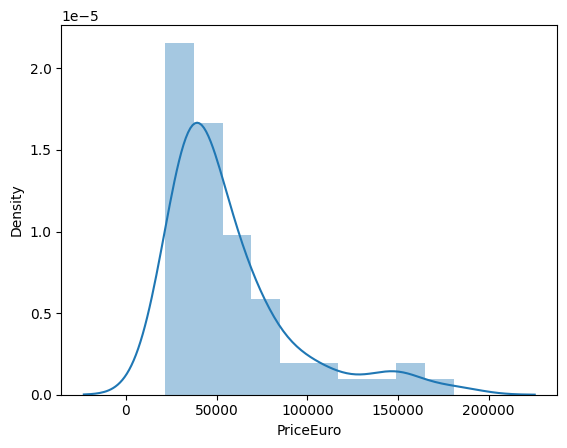

In [11]:
sns.distplot(df['PriceEuro'])

Text(0, 0.5, 'Number of BR')

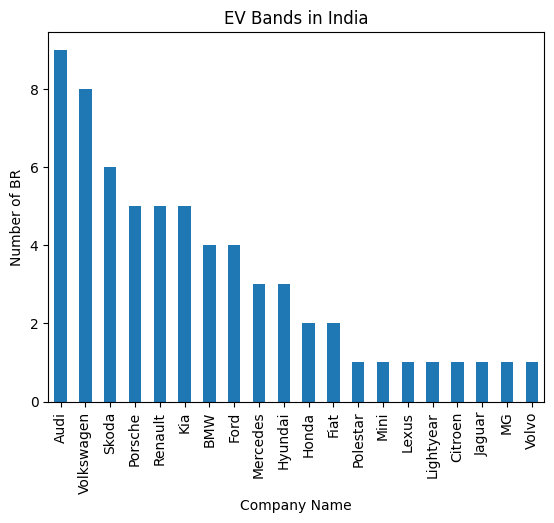

In [12]:
df['Brand'].value_counts().plot(kind = 'bar')
plt.title('EV Bands in India')
plt.xlabel('Company Name')
plt.ylabel('Number of BR')

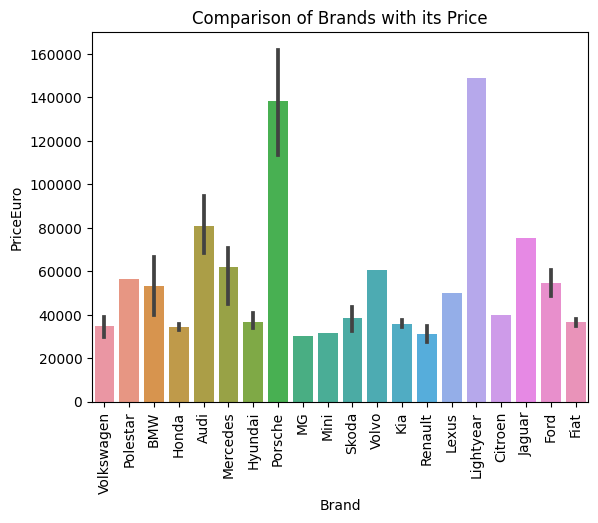

In [13]:
sns.barplot(x = df['Brand'], y=df['PriceEuro'])
plt.title('Comparison of Brands with its Price')
plt.xticks(rotation = 'vertical')
plt.show()

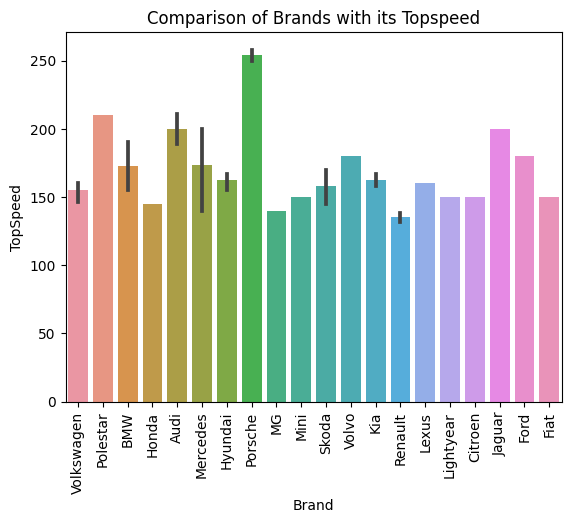

In [14]:
sns.barplot(x = df['Brand'], y=df['TopSpeed'])
plt.title('Comparison of Brands with its Topspeed')
plt.xticks(rotation = 'vertical')
plt.show()

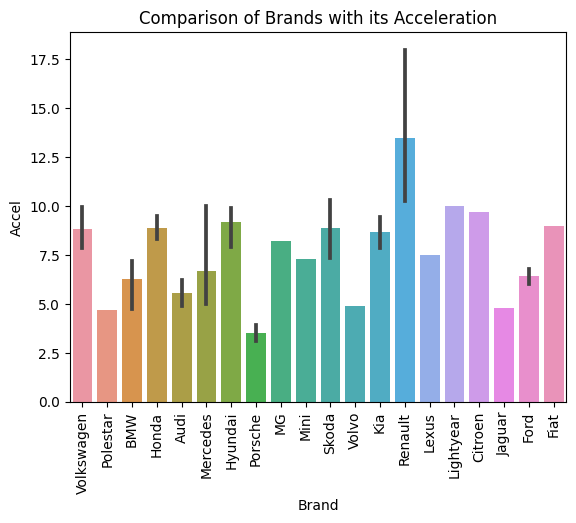

In [15]:
sns.barplot(x = df['Brand'], y=df['Accel'])
plt.title('Comparison of Brands with its Acceleration')
plt.xticks(rotation = 'vertical')
plt.show()

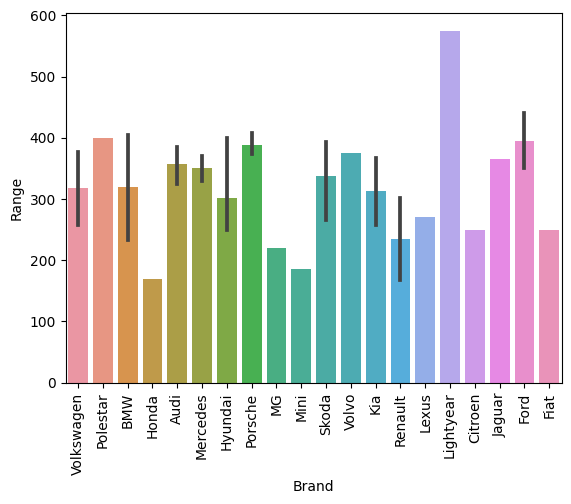

In [16]:
sns.barplot(x = df['Brand'], y=df['Range'])
plt.xticks(rotation = 'vertical')
plt.show()

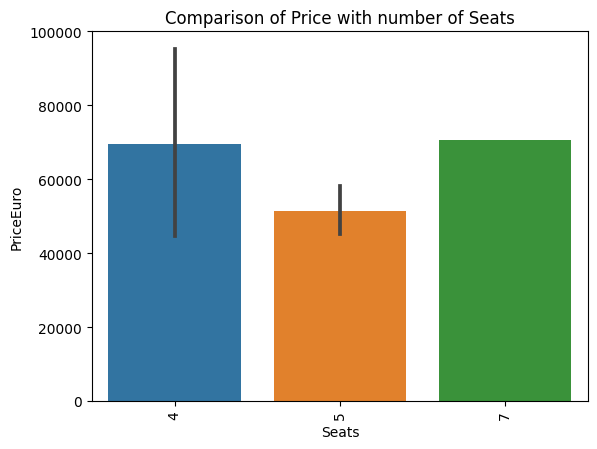

In [17]:
sns.barplot(x = df['Seats'], y=df['PriceEuro'])
plt.title('Comparison of Price with number of Seats')
plt.xticks(rotation = 'vertical')
plt.show()

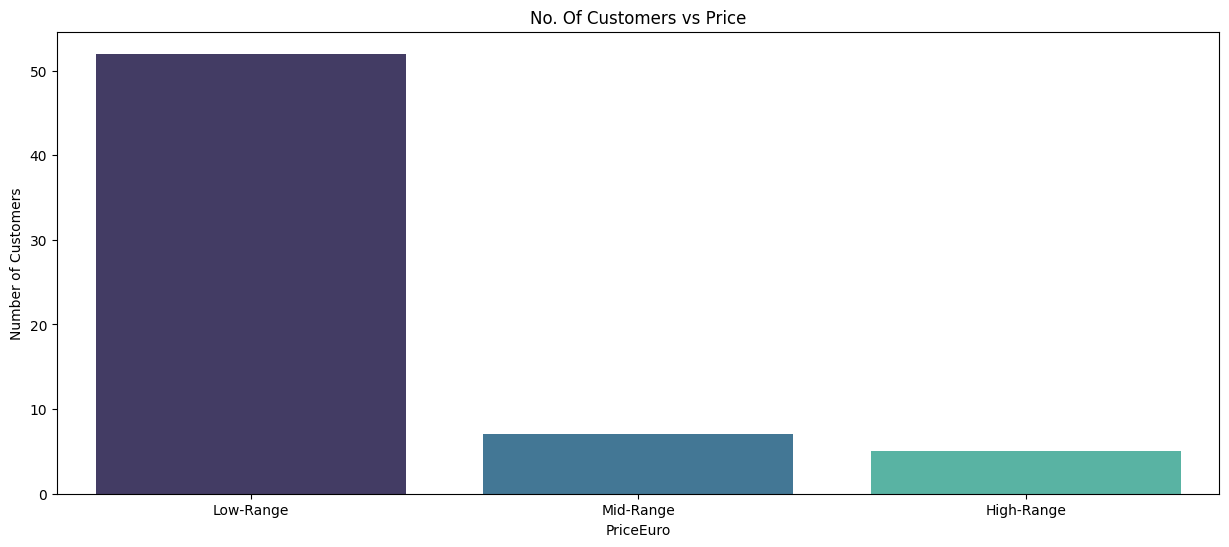

In [18]:
Price_20_73 = df.PriceEuro[(df.PriceEuro >= 20000) & (df.PriceEuro <= 73000)]
Price_73_120 = df.PriceEuro[(df.PriceEuro >= 73000) & (df.PriceEuro <= 120000)]
Price_120_181 = df.PriceEuro[(df.PriceEuro >= 120000) & (df.PriceEuro<= 181000)]

pricex = ["Low-Range","Mid-Range","High-Range"]
pricey = [len(Price_20_73.values),len(Price_73_120.values),len(Price_120_181.values)]
plt.figure(figsize = (15,6))
sns.barplot(x = pricex, y= pricey, palette = "mako")
plt.title('No. Of Customers vs Price')
plt.xlabel("PriceEuro")
plt.ylabel("Number of Customers")
plt.show()

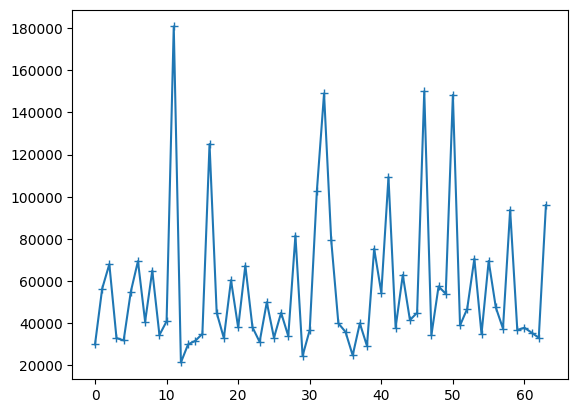

In [19]:
plt.plot(df['PriceEuro'], marker = '+')

Text(0, 0.5, 'Efficiency')

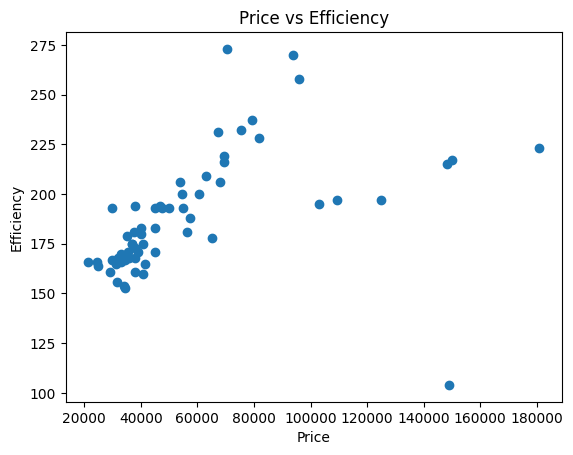

In [20]:
plt.scatter(df['PriceEuro'], df['Efficiency'])
plt.title('Price vs Efficiency')
plt.xlabel('Price')
plt.ylabel('Efficiency')

In [21]:
df['PowerTrain'].value_counts()

All Wheel Drive      24
Front Wheel Drive    22
Rear Wheel Drive     18
Name: PowerTrain, dtype: int64

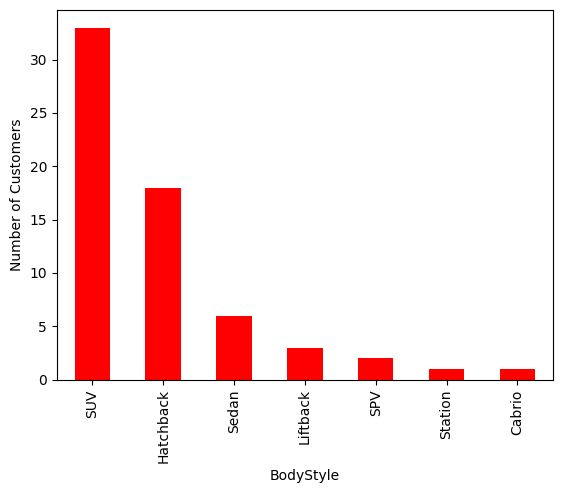

In [22]:
df['BodyStyle'].value_counts().plot(kind = 'bar',color = 'red')
plt.xlabel("BodyStyle")
plt.ylabel("Number of Customers")
plt.show()

<Axes: >

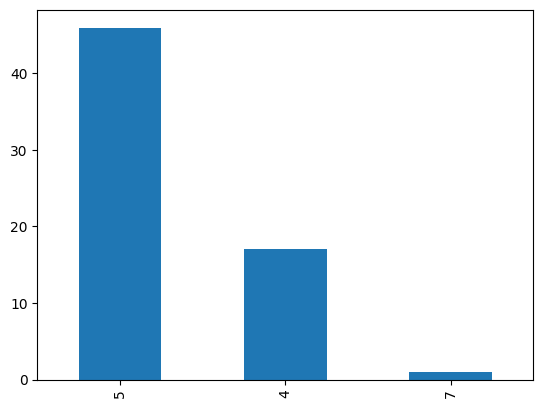

In [23]:
df['Seats'].value_counts().plot(kind = 'bar')

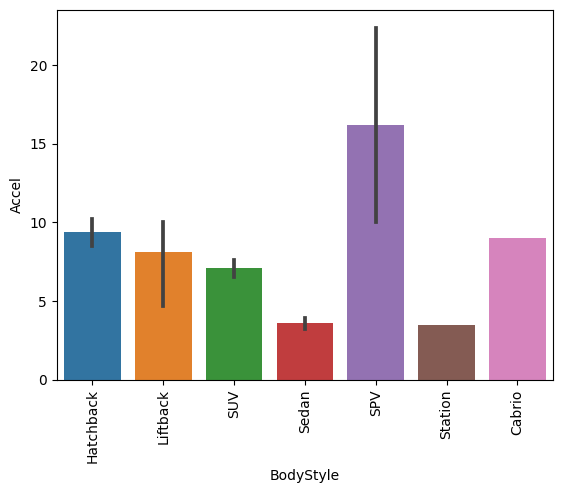

In [24]:
sns.barplot(x = df['BodyStyle'], y=df['Accel'])
plt.xticks(rotation = 'vertical')
plt.show()

([<matplotlib.patches.Wedge at 0x7a3b8255b6d0>,
 [Text(0.34629406442350547, 1.0440691648281972, 'All Wheel Drive'),
  Text(-0.9715921058408141, -0.5157603899756286, 'Front Wheel Drive'),
  Text(0.795405580030513, -0.7598223234785376, 'Rear Wheel Drive')])

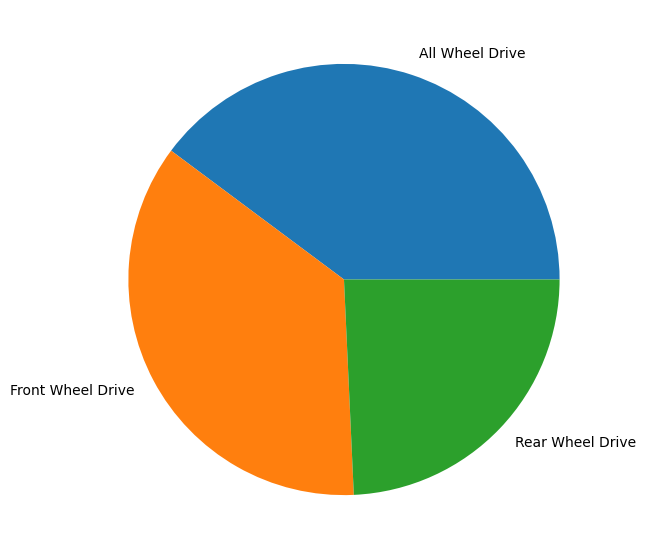

In [25]:
PowerTrain = ['All Wheel Drive', 'Front Wheel Drive', 'Rear Wheel Drive']
data = [41,37,25]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = PowerTrain)

Text(0.5, 1.0, 'Number of Segments')

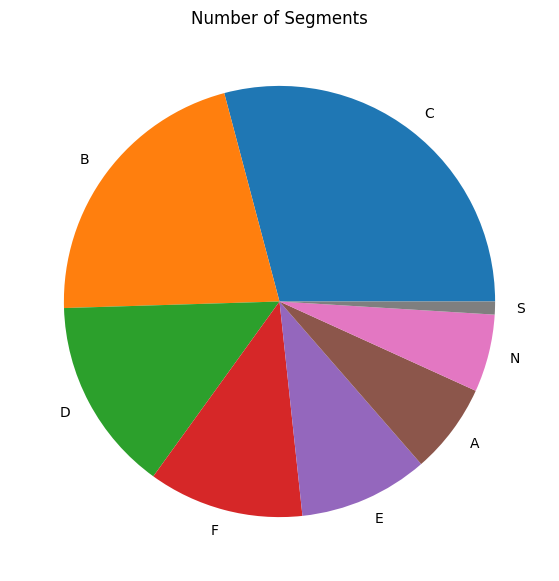

In [26]:
Segment = ['C','B','D','F','E','A','N','S']
data = [30,22,15,12,10,7,6,1]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Segment)
plt.title('Number of Segments')

In [27]:
df['CarName'] = df['Brand'] + '-' + df['Model']
df1= df.loc[df['PriceEuro'] <=60000]
df2 = df.loc[df['PriceEuro'] >60000]
t1 = 'less than INR 60000'
t2 = 'more thanINR 60000'

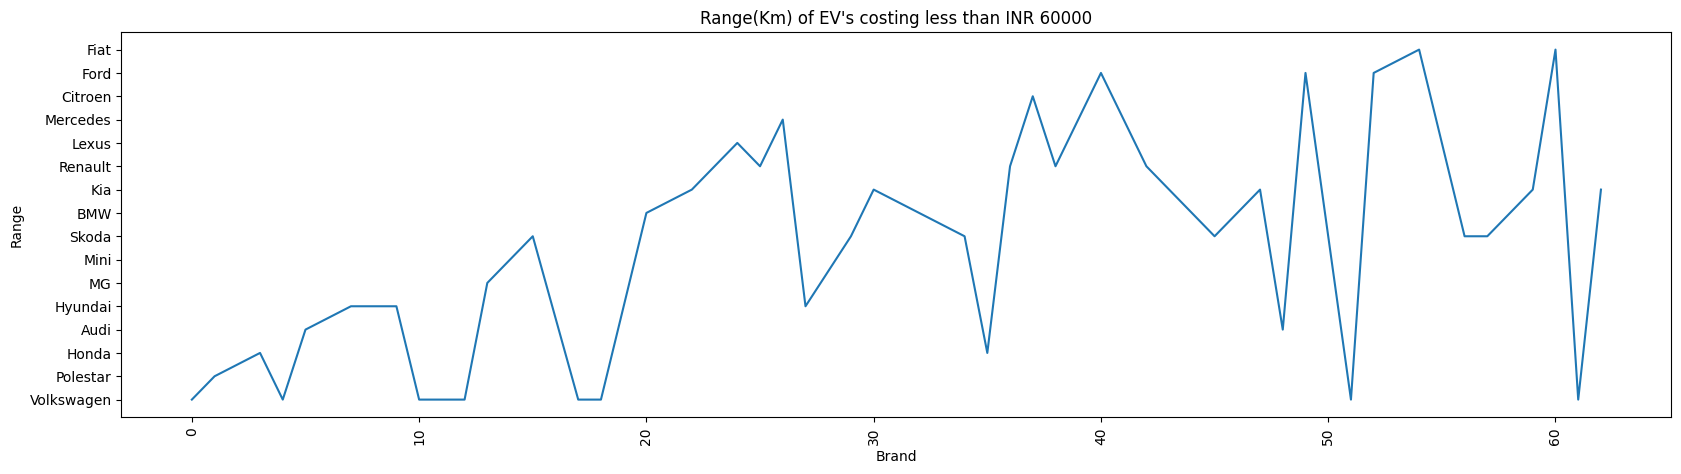

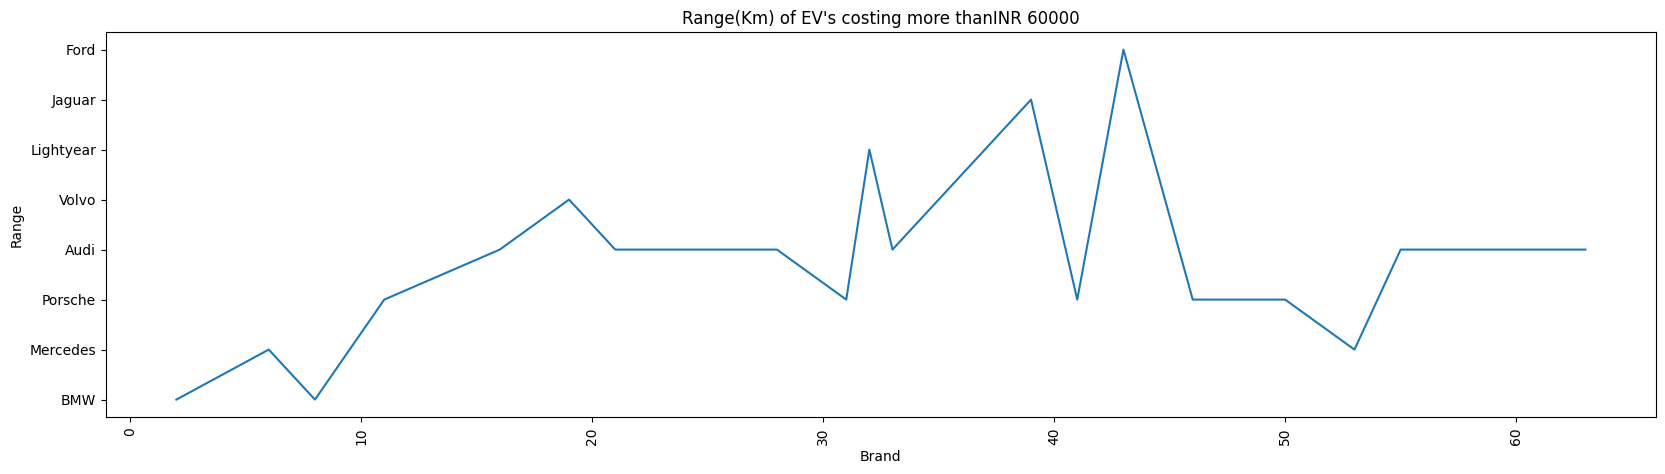

In [28]:
def range(dataframe, PriceEuro):

    plt.figure(figsize=(20,5))
    plt.plot('Brand',data=dataframe)
    plt.title('''Range(Km) of EV's costing {}'''.format(PriceEuro))
    plt.ylabel('Range')
    plt.xlabel('Brand')
    plt.xticks(rotation = 90)
    plt.show()

range(df1, t1)
range(df2, t2)

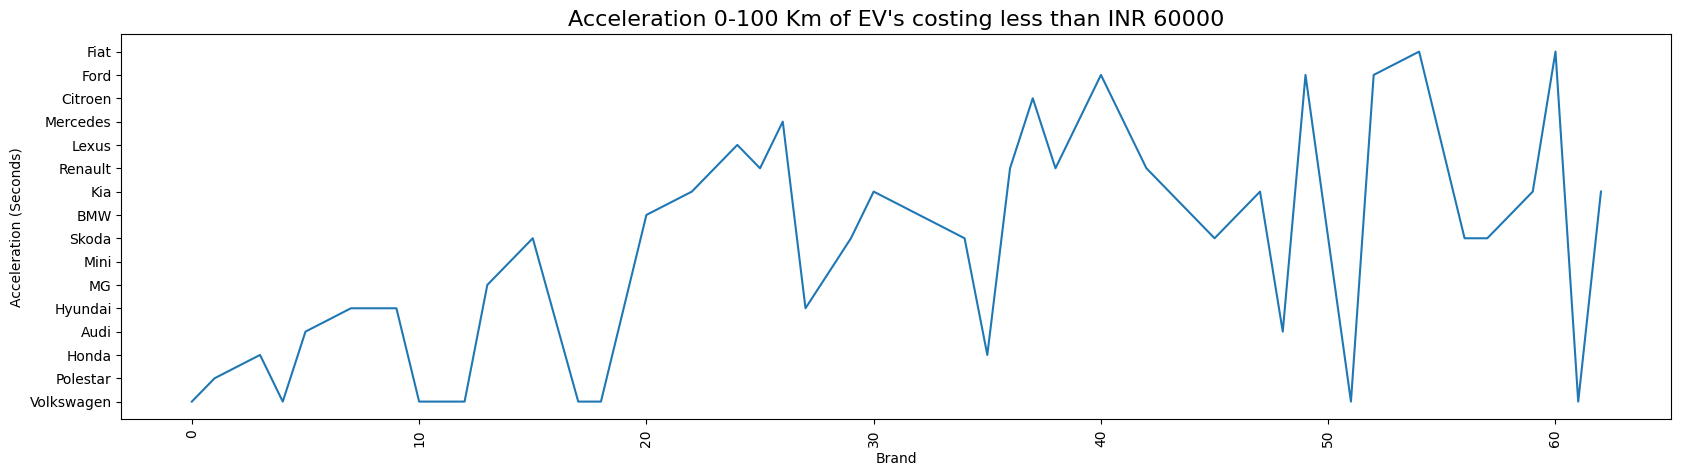

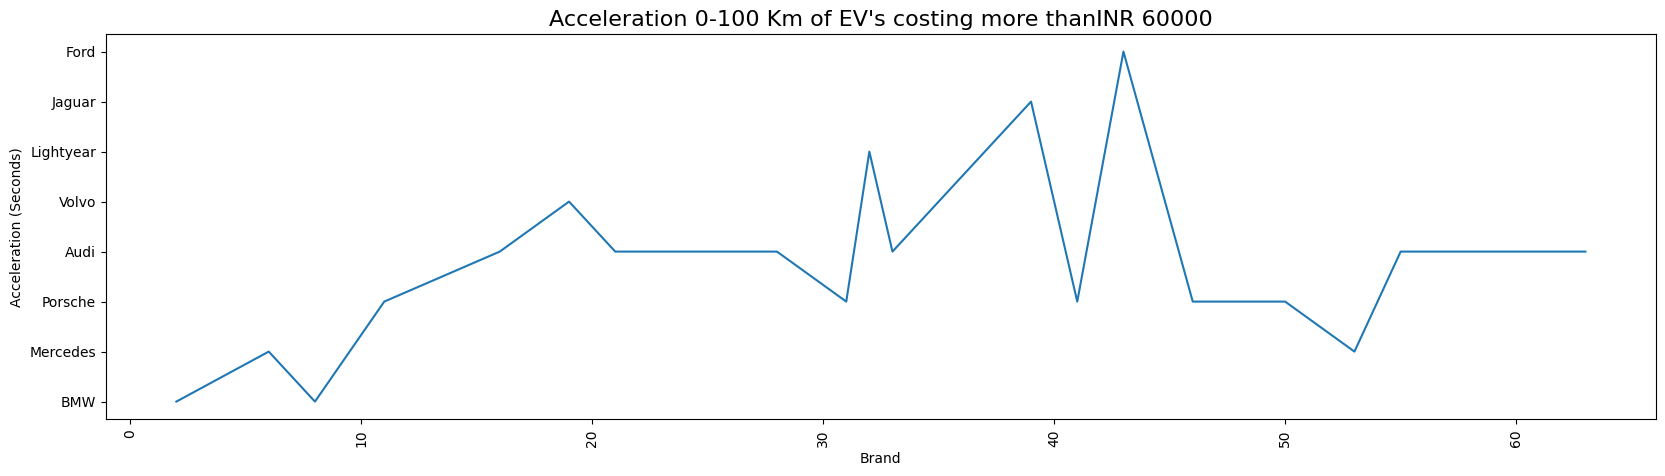

In [29]:
def acc(dataframe, text):
    plt.figure(figsize=(20,5))
    plt.plot('Brand',data=dataframe)
    plt.title('''Acceleration 0-100 Km of EV's costing {}'''.format(text), fontsize=16)
    plt.ylabel('Acceleration (Seconds)')
    plt.xlabel('Brand')
    plt.xticks(rotation = 90)
    plt.show()

acc(df1,t1)
acc(df2,t2)

In [30]:
# Vehicles to buy with max range(Km) on accel
top_range_ = df.sort_values(by= 'Accel', ascending= False)
print(top_range_[['Brand', 'Range', 'Efficiency', 'PriceEuro']])

         Brand  Range  Efficiency  PriceEuro
42     Renault    160         194      38000
36     Renault    130         164      24790
29       Skoda    195         166      24534
12  Volkswagen    195         166      21421
38     Renault    255         161      29234
..         ...    ...         ...        ...
31     Porsche    365         195     102945
16        Audi    425         197     125000
46     Porsche    385         217     150000
50     Porsche    390         215     148301
11     Porsche    375         223     180781

[64 rows x 4 columns]


In [31]:
# Vehicles to buy with max range(Km) on eff
top_range_ = df.sort_values(by= 'Efficiency', ascending= False)
print(top_range_[['Brand', 'Range', 'Efficiency', 'PriceEuro']])

        Brand  Range  Efficiency  PriceEuro
53   Mercedes    330         273      70631
58       Audi    320         270      93800
63       Audi    335         258      96050
33       Audi    365         237      79445
39     Jaguar    365         232      75351
..        ...    ...         ...        ...
7     Hyundai    400         160      40795
14       Mini    185         156      31681
27    Hyundai    255         154      33971
9     Hyundai    250         153      34459
32  Lightyear    575         104     149000

[64 rows x 4 columns]


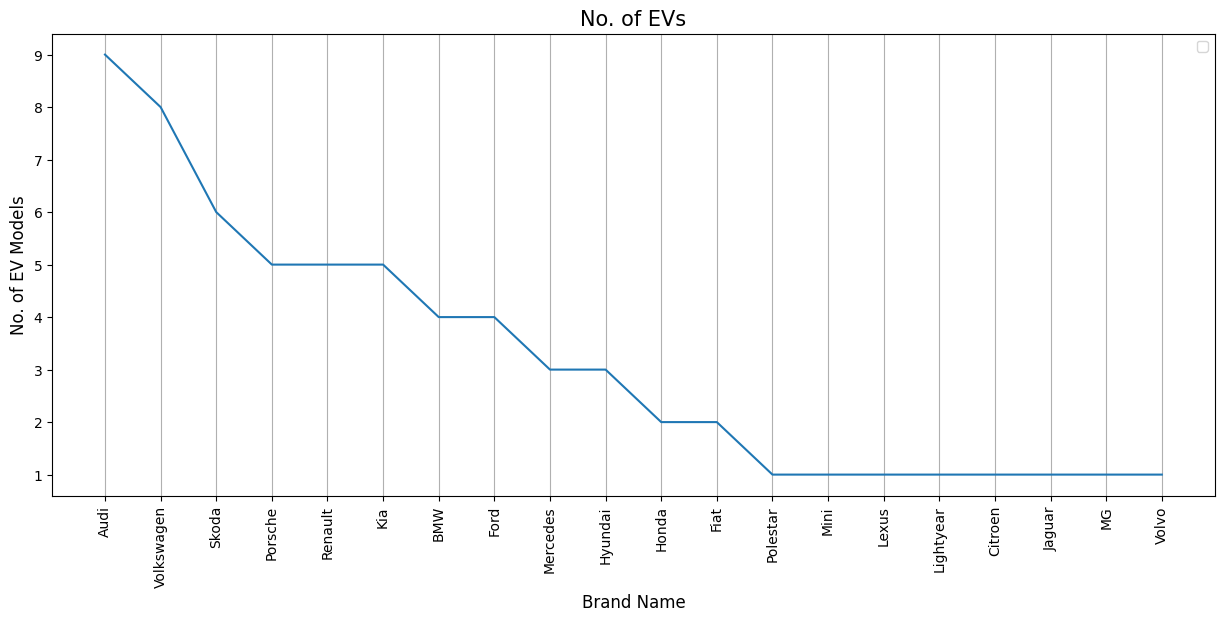

In [32]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.legend()
plt.xlabel("Brand Name",fontsize=12)
plt.ylabel("No. of EV Models",fontsize=12)
plt.title('No. of EVs',fontsize=15)
plt.plot(df['Brand'].value_counts(), label='No. of Models')
plt.show()

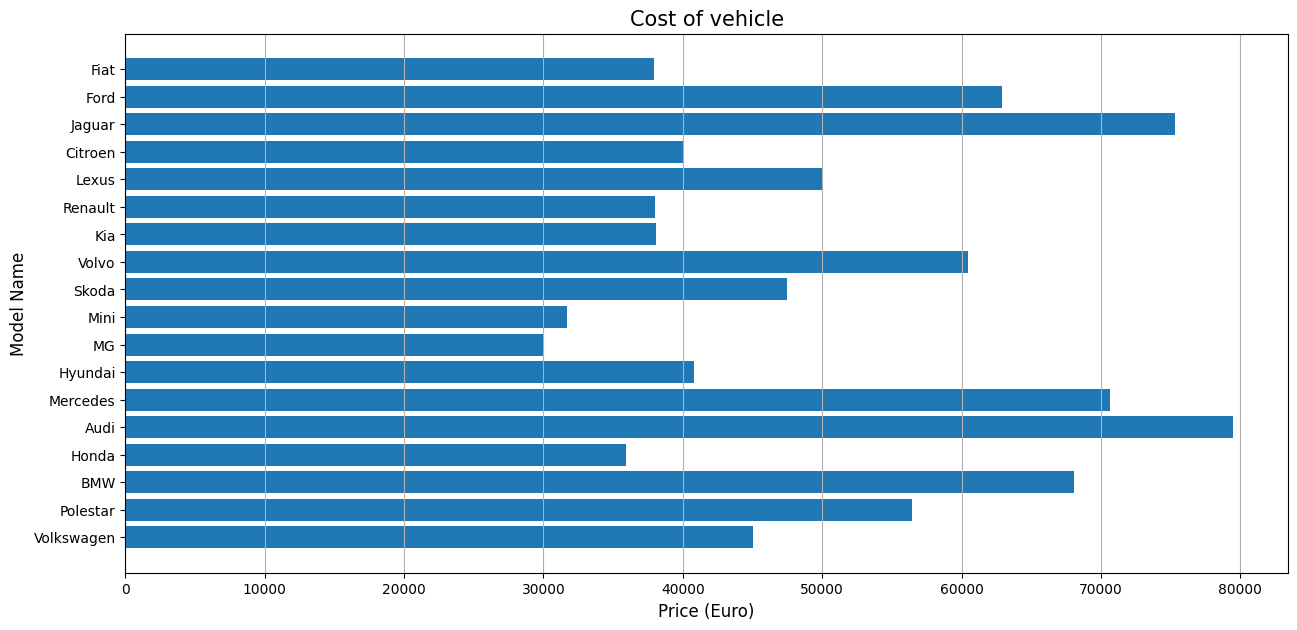

In [33]:
df4 = df[df['PriceEuro']>80000] # cost greater than 50000 Euros
df5 =df[df['PriceEuro']<80000] # cost less than 80000 Euros

plt.figure(figsize=(15,7))
plt.title("Cost of vehicle",fontsize=15)
plt.xticks(rotation = 0)
plt.grid(axis='x')

plt.ylabel("Model Name",fontsize=12)
plt.xlabel("Price (Euro)",fontsize=12)
plt.barh(df5['Brand'],df5['PriceEuro'],label='Range')
plt.show()

In [34]:
df.corr()

<ipython-input-34-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Accel,TopSpeed,Range,Efficiency,Seats,PriceEuro,Cluster
Accel,1.000000,-0.789851,-0.568357,-0.426191,0.125402,-0.579835,-0.523295
TopSpeed,-0.789851,1.000000,0.525144,0.520590,-0.215507,0.817914,0.723340
Range,-0.568357,0.525144,1.000000,0.189183,0.239916,0.538116,0.463594
Efficiency,-0.426191,0.520590,0.189183,1.000000,0.296792,0.449228,0.490132
Seats,0.125402,-0.215507,0.239916,0.296792,1.000000,-0.168874,-0.101911
PriceEuro,-0.579835,0.817914,0.538116,0.449228,-0.168874,1.000000,0.927788
Cluster,-0.523295,0.723340,0.463594,0.490132,-0.101911,0.927788,1.000000


<ipython-input-35-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

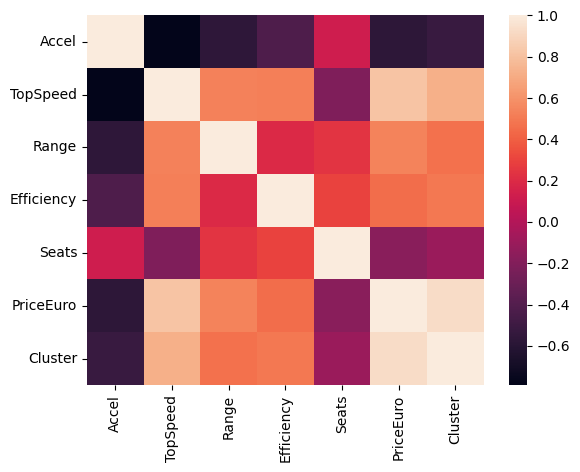

In [35]:
sns.heatmap(df.corr())

In [36]:
X = df.drop(['PriceEuro'],axis =1)
Y = df['PriceEuro']

In [37]:
km = KMeans(n_clusters = 3, random_state=0)
km

KMeans(n_clusters=3, random_state=0)

In [38]:
predicted = km.fit_predict(df[['Accel',	'TopSpeed'	,'Range',	'Seats','PriceEuro']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
df['Cluster'] = predicted
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,CarName,Cluster
0,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,Volkswagen-ID.3 Pure,0
1,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,Polestar-2,0
2,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,BMW-iX3,1
3,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,Honda-e,0
4,Volkswagen,e-Golf,9.6,150,190,168,220,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,31900,Volkswagen-e-Golf,0


In [40]:
km.cluster_centers_

array([[8.78409091e+00, 1.58522727e+02, 2.98863636e+02, 4.75000000e+00,
        3.84883636e+04],
       [5.57333333e+00, 1.97333333e+02, 3.63000000e+02, 5.00000000e+00,
        7.81288667e+04],
       [4.60000000e+00, 2.32000000e+02, 4.30000000e+02, 4.20000000e+00,
        1.50616400e+05]])

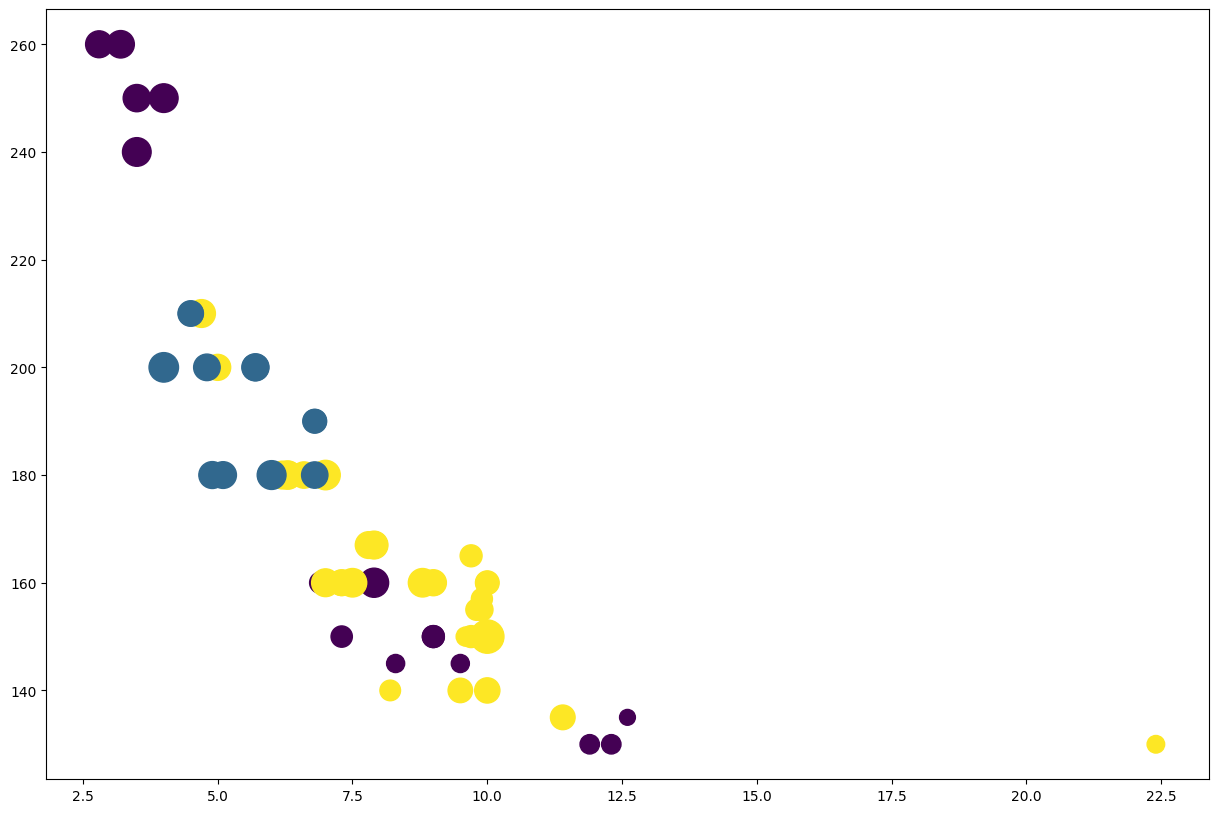

In [41]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
fig = plt.figure(figsize =(15, 10))
plt.scatter(df1.Accel, df1.TopSpeed, df1.Range, df1.Seats)
plt.scatter(df2.Accel, df2.TopSpeed, df2.Range, df2.Seats)
plt.scatter(df3.Accel, df3.TopSpeed, df3.Range, df3.Seats)
